In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
filePath = "salary.csv"
df  = pd.read_csv(filePath)


# Exploring the data

In [49]:
df.head(5)

,Unnamed: 0,degree,rank,sex,year,ysdeg,salary
0,1,Masters,Prof,Male,25,35,36350
1,2,Masters,Prof,Male,13,22,35350
2,3,Masters,Prof,Male,10,23,28200
3,4,Masters,Prof,Female,7,27,26775
4,5,PhD,Prof,Male,19,30,33696


In [6]:
df.tail(5)

,Unnamed: 0,degree,rank,sex,year,ysdeg,salary
47,48,Masters,Asst,Female,2,2,15350
48,49,Masters,Asst,Male,1,1,16244
49,50,Masters,Asst,Female,1,1,16686
50,51,Masters,Asst,Female,1,1,15000
51,52,Masters,Asst,Female,0,2,20300


In [15]:
df[df['degree'] ==   'Masters'].count()

Unnamed: 0    34
degree        34
rank          34
sex           34
year          34
ysdeg         34
salary        34
dtype: int64

# Performing univariate analysis

# Pie charts

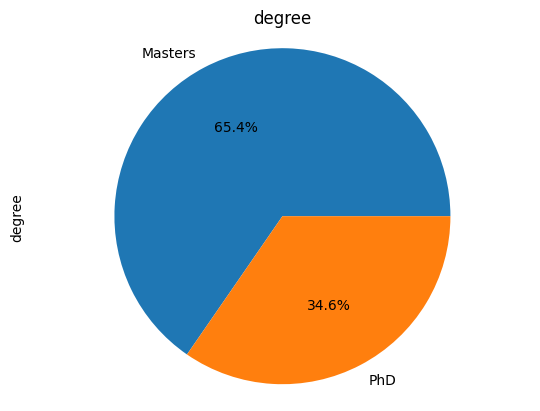

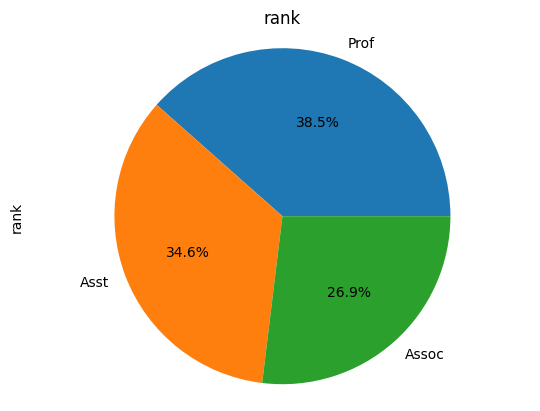

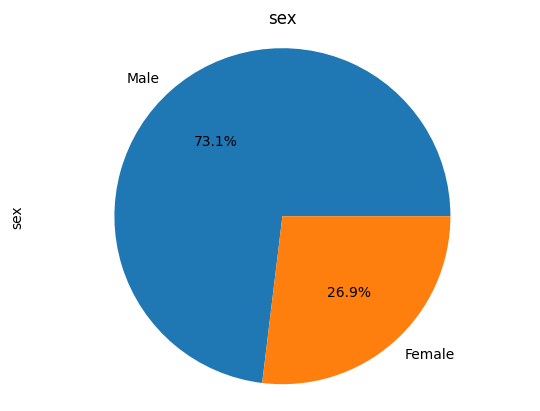

In [28]:
# Define a list of the column names
categorical_columns = ['degree', 'rank', 'sex']

# Create a pie chart for each column
for col in categorical_columns:
    plt.figure()
    plt.title(col)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

<h4>But keep in mind that for features with many categories, it's not recommended to use pie chart, because it can be hard to distringuish the small differences of the proportions by just eye balling. So we will use other visualization techniques such as histograms, box plots, or density plots for continuous vairables and bar charts for categorical variables.</h4>

# Bar charts

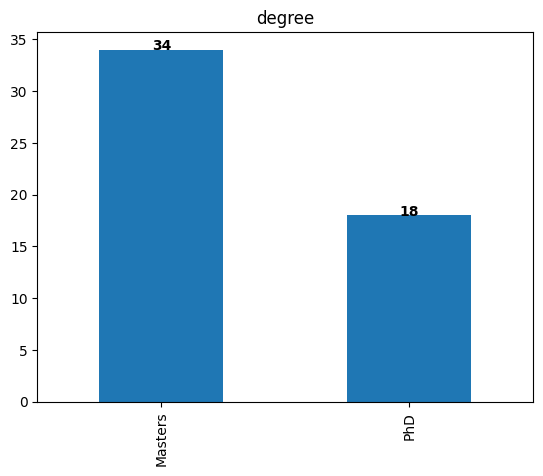

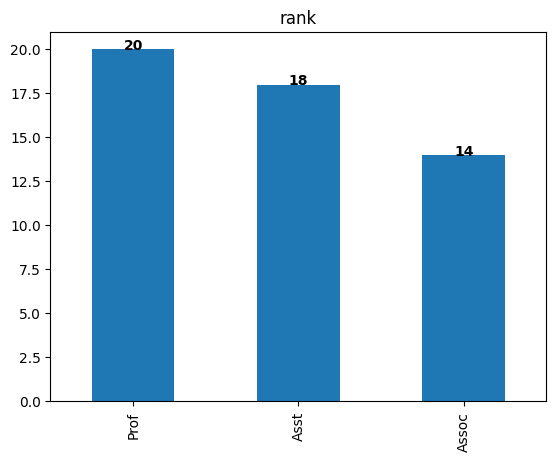

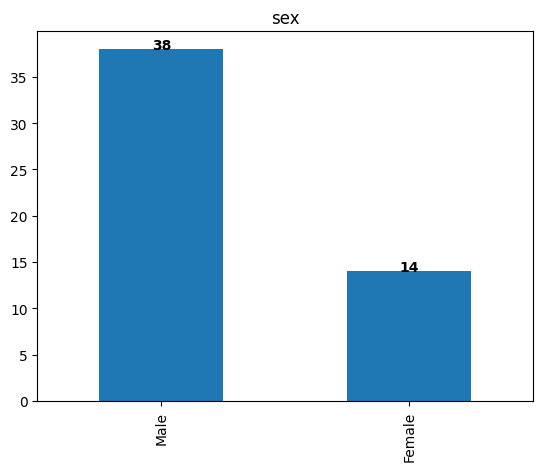

In [36]:
# Define the categorical columns
\
# Create a bar chart for each categorical column
for col in categorical_columns:
    plt.figure()
    plt.title(col)
    df[col].value_counts().plot(kind='bar')
    
    # Add frequency counts to the bars
    for i, v in enumerate(df[col].value_counts()):
        plt.text(i, v, str(v), ha='center', fontweight='bold')


    plt.show()

<h4>
Note that for the sex column, there are only two categories (Male and Female), so the bar chart will show two bars. For the degree and rank columns, there are multiple categories, so the bar chart will show multiple bars.
</h4>

<h4>
Keep in mind that bar charts are a good way to visualize the distribution of categorical variables, as they allow you to compare the frequency of each category.
</h4>

# Stacked Bar Charts


<h3>
We can create a stacked bar chart to examine the distrbution of salary by sex and rank.
</h3>

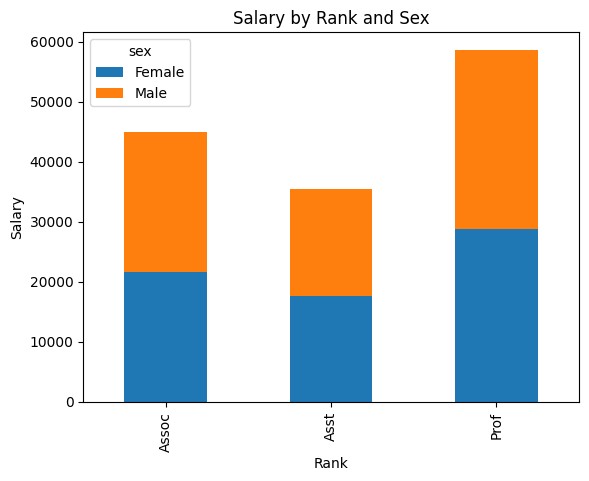

In [37]:
# Create a pivot table to calculate the mean salary by sex and rank
pivot = df.pivot_table(values='salary', index='rank', columns='sex', aggfunc='mean')

# Create a stacked bar chart
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.title('Salary by Rank and Sex')
plt.show()

# Histogram of salary

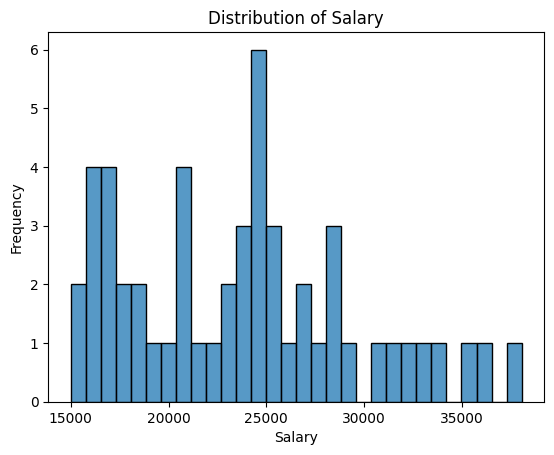

In [35]:
sns.histplot(x="salary", data=df, bins=30)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Distribution of Salary")
plt.show()

<h4>
The first plot shows the distribution of salary, which is slightly right-skewed. Which means.....?
</h4>

# Box plot of salary by sex

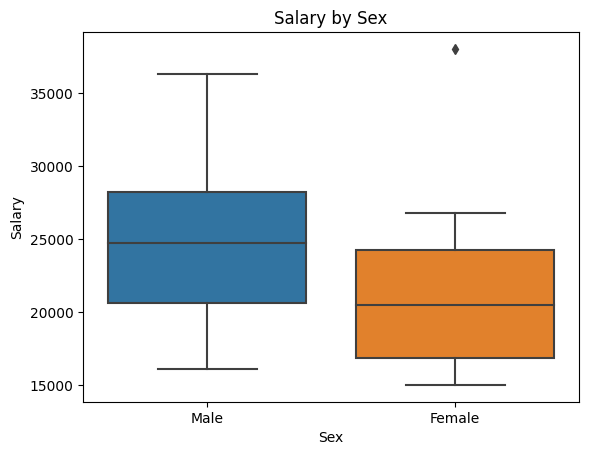

In [22]:
sns.boxplot(x="sex", y="salary", data=df)
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.title("Salary by Sex")
plt.show()

<h4>The second plot shows the median and spread of salary for men and women, with men having a slightly higher median salary than women.</h4>

# Box plot of salary by rank

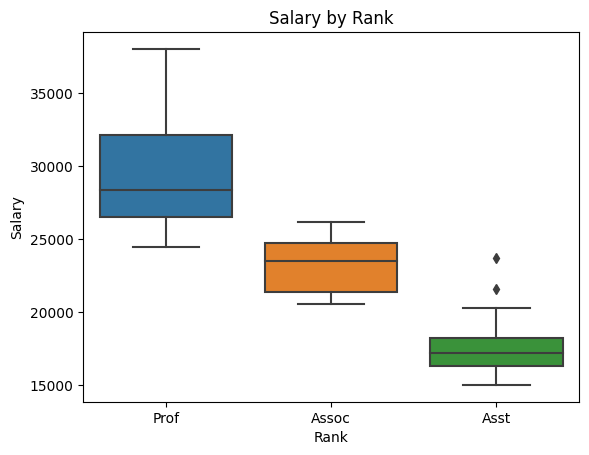

In [38]:
# Create box plot
sns.boxplot(x='rank', y='salary', data=df)
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.title('Salary by Rank')
plt.show()

<h4>As expected, professors have the highest annual salary.</h4>

# Scatter plot of salary vs years since highest degree

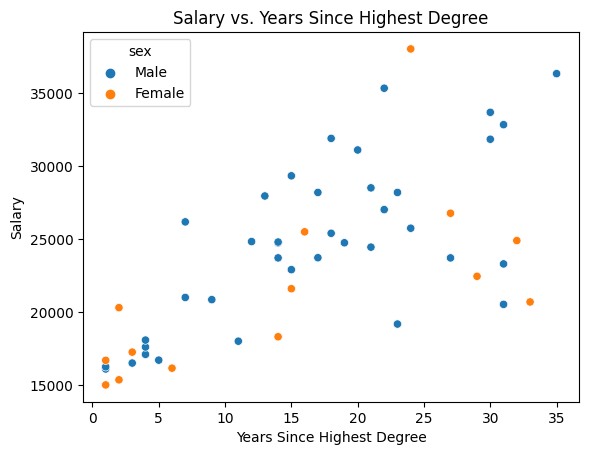

In [25]:
sns.scatterplot(x="ysdeg", y="salary", data=df, hue="sex")
plt.xlabel("Years Since Highest Degree")
plt.ylabel("Salary")
plt.title("Salary vs. Years Since Highest Degree")
plt.show()

<h4> The third plot shows the relationship between salary and years since highest degree, with dots colored by sex._____________________________________________________________</h4>

<h3>
2. Test the hypothesis that the mean salary for men and women is the same. What alternative hypothesis
do you think is appropriate?
</h3>

<h3>To test the hypothesis that the mean salary for men and women is the same, we can use a two-sample t-test with a null hypothesis that the mean salary for men and women is equal, and an alternative hypothesis that the mean salary for men and women is different.</h3>

In [45]:
from scipy.stats import ttest_ind

male_salary = df[df["sex"] == "Male"]["salary"]
female_salary = df[df["sex"] == "Female"]["salary"]     


t, p = ttest_ind(male_salary, female_salary, equal_var=False)
print(f"t = {t}, p-value = {p}")

t = 1.7744380049367063, p-value = 0.09009405709468926


<h4>The output shows a t-statistic of 1.78 and a p-value of 0.09, which is above the significance level of 0.05. Therefore, we do not have sufficient evidence to reject the null hypothesis and we can't conclude that there is a significant difference in mean salary between men and women.</h4>

In [98]:
import statsmodels.api as smf

<h3>
3. Assuming no interactions between sex and the other predictors, obtain a 95% confidence interval for the difference in salary between males and females.
</h3>

<h4>
To obtain a 95% confidence interval for the difference in salary between males and females, we can use the smf.ols function from the statsmodels library in Python:
</h4>

# Assumption of two sample t-tests

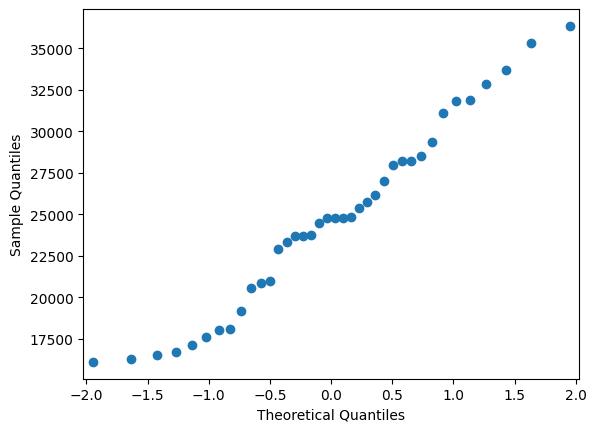

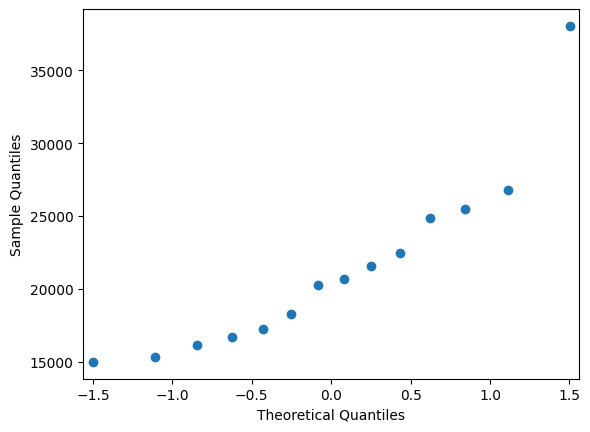

In [85]:
import statsmodels.api as sm

a = np.random.normal(5, 5, 250)
smf.qqplot(df[df['sex'] == 'Male']['salary'])

smf.qqplot(df[df['sex'] == 'Female']['salary'])

plt.show()


In [75]:
type(df)

pandas.core.frame.DataFrame

## Using SciPy instead...........

In [74]:
from scipy import stats

# Compute the mean salary for males and females
male_salary = df[df['sex'] == 'Male']['salary'].mean()
female_salary = df[df['sex'] == 'Female']['salary'].mean()

# Compute the standard error of the difference in means
male_std = df[df['sex'] == 'Male']['salary'].std()
female_std = df[df['sex'] == 'Female']['salary'].std()
se_diff = np.sqrt((male_std**2/len(df[df['sex'] == 'Male'])) + (female_std**2/len(df[df['sex'] == 'Female'])))

# Compute the t-value and degrees of freedom
t = (male_salary - female_salary) / se_diff
degreeFreedom = len(df[df['sex'] == 'Male']) + len(df[df['sex'] == 'Female']) - 2

# Compute the confidence interval
ci = stats.t.interval(0.95, degreeFreedom, loc=(male_salary - female_salary), scale=se_diff)

print('95% Confidence Interval for the Difference in Salary between Males and Females:')
print(f'[{ci[0]:.2f}, {ci[1]:.2f}]')


95% Confidence Interval for the Difference in Salary between Males and Females:
[-440.64, 7119.93]


<h3>
4. Finkelstein (1980), in a discussion of the use of regression in discrimination cases, wrote, “[a] variable
may reflect a position or status bestowed by the employer, in which cases if there is discrimination in
the award of the position or status, the variable may be ‘tainted.’ ” Thus, for example, if discrimination
is at work in promotion of faculty to higher ranks, using rank to adjust salaries before comparing the
sexes may be not acceptable to the courts. Exclude the variable rank, refit, and summarize. ‘
</h3>

In [108]:
import statsmodels.formula.api as smf

# Fit the model without the 'rank' variable
model = smf.ols(formula='salary ~ sex + degree + year + ysdeg', data=df).fit()

# Summarize the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     20.11
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.05e-09
Time:                        22:08:21   Log-Likelihood:                -499.00
No. Observations:                  52   AIC:                             1008.
Df Residuals:                      47   BIC:                             1018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.59e+04   1259.866     12.618